In [165]:
#### Lab | Customer Analysis Final Round #######################################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
import math
import warnings
warnings.filterwarnings('ignore')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## For this lab, we still keep using the marketing_customer_analysis.csv ##

## 01 - Problem (case study): Data Description + Goal ##

In [2]:
# Predicting the total claim amount based on the data provided (marketing_customer_analysis.csv)

## 02 - Getting Data: Read the .csv file ##

In [3]:
data = pd.read_csv('marketing_customer_analysis.csv')

In [4]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
data.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [6]:
data.shape

(9134, 24)

## 03 - Cleaning/Wrangling/EDA: ##

### Change headers names #

In [7]:
data.columns = [val.lower().replace(' ','_') for val in data.columns]

In [8]:
#data.head()
data['gender'].value_counts()

F    4658
M    4476
Name: gender, dtype: int64

In [9]:
data = data.drop_duplicates()

In [10]:
data = data.drop(['customer'], axis=1)

In [11]:
data.shape

(9134, 23)

In [12]:
data['state'].value_counts().unique

<bound method Series.unique of California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64>

In [13]:
X_Cat = data.select_dtypes(include=np.object)
for val in X_Cat.columns:
    print(X_Cat[val].unique())
    

['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
['No' 'Yes']
['Basic' 'Extended' 'Premium']
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
['2/24/11' '1/31/11' '2/19/11' '1/20/11' '2/3/11' '1/25/11' '1/18/11'
 '1/26/11' '2/17/11' '2/21/11' '1/6/11' '2/6/11' '1/10/11' '1/17/11'
 '1/5/11' '2/27/11' '1/14/11' '1/21/11' '2/5/11' '1/29/11' '2/28/11'
 '2/12/11' '2/2/11' '2/7/11' '1/22/11' '2/13/11' '1/15/11' '1/8/11'
 '1/11/11' '1/28/11' '2/8/11' '2/23/11' '1/2/11' '2/16/11' '1/27/11'
 '1/23/11' '1/9/11' '2/11/11' '2/4/11' '2/1/11' '2/15/11' '2/26/11'
 '1/16/11' '1/1/11' '2/10/11' '1/24/11' '2/25/11' '1/12/11' '2/9/11'
 '1/19/11' '1/4/11' '2/14/11' '2/20/11' '2/18/11' '1/3/11' '1/13/11'
 '1/30/11' '2/22/11' '1/7/11']
['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
['F' 'M']
['Suburban' 'Rural' 'Urban']
['Married' 'Single' 'Divorced']
['Corporate Auto' 'Personal Auto' 'Special Auto']
['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2

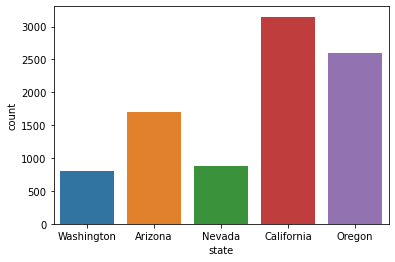

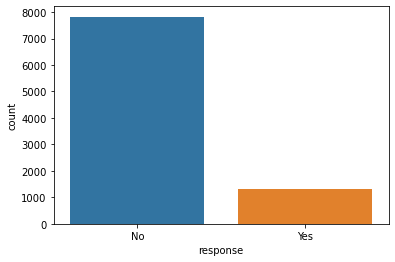

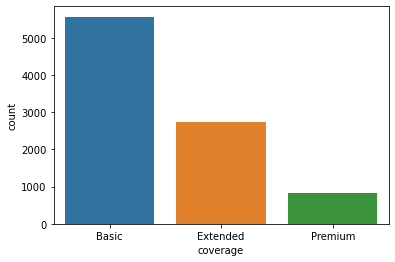

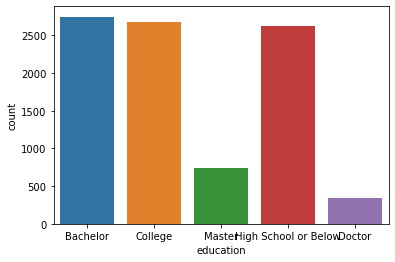

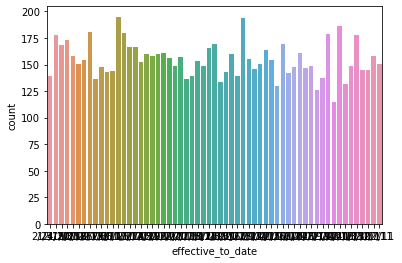

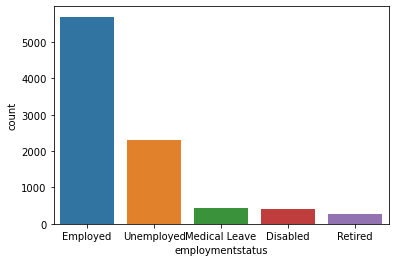

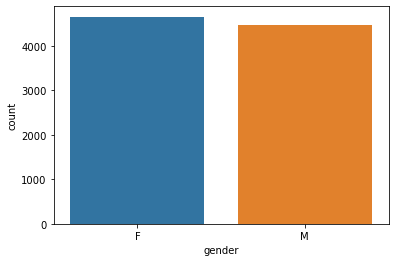

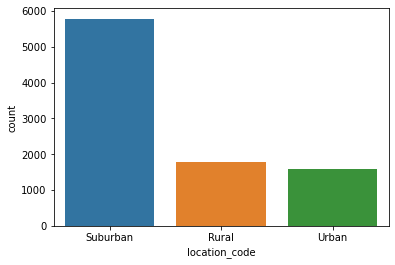

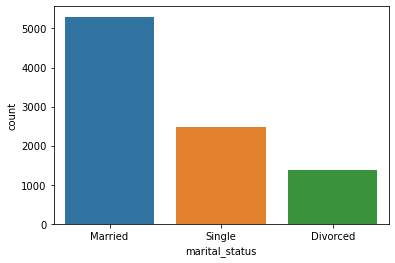

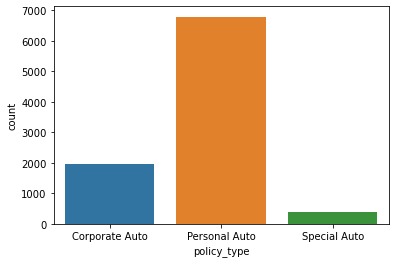

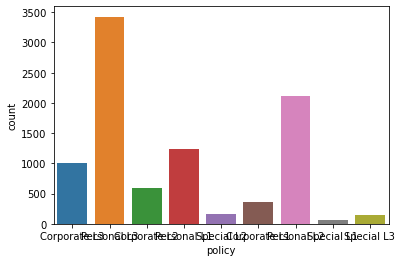

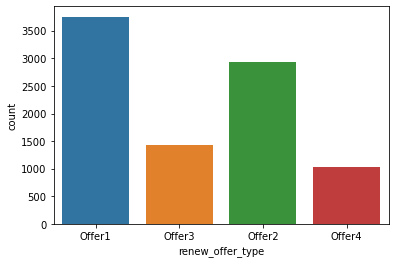

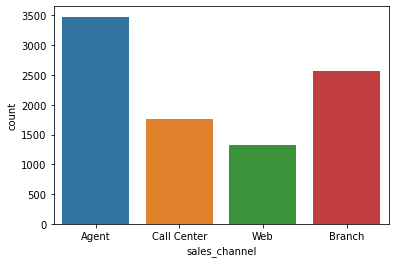

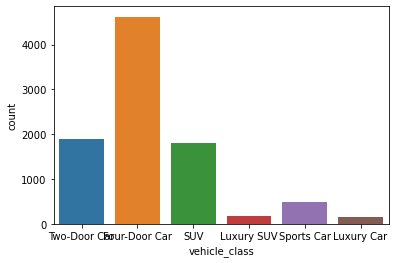

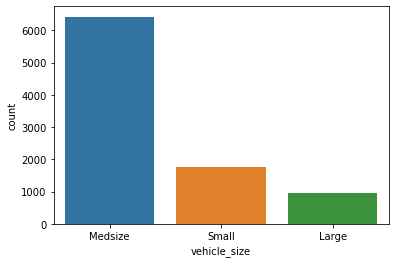

In [14]:
for val in X_Cat.columns:
    sns.countplot(x=data[val])
    plt.show()

In [15]:
data['effective_to_date'] = pd.to_datetime(data['effective_to_date'], errors='coerce')

In [16]:
#data.dtypes

### Deal with NaN values #

In [17]:
data.isna().sum()
# since there are no NaN values, we dont have to replace / deal with NaN's

state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

### Categorical Features #

In [18]:
X_cat = data.select_dtypes(include=np.object)

In [33]:
#X_cat.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


### Numerical Features #

In [20]:
X_num = data.select_dtypes(include=np.number)

In [21]:
#X_num.head()

### Exploration #

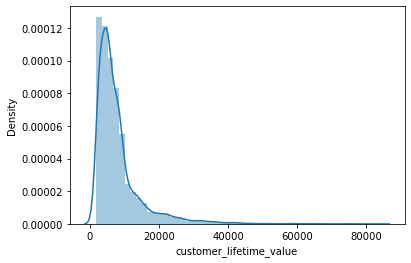

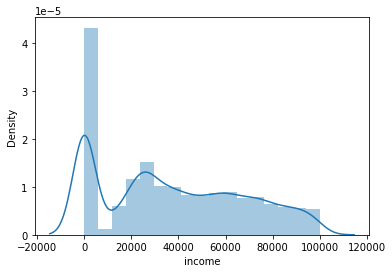

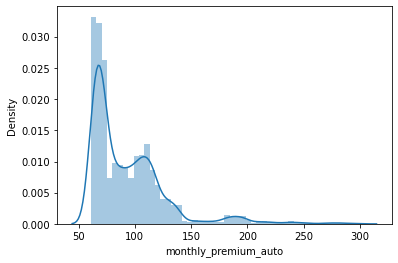

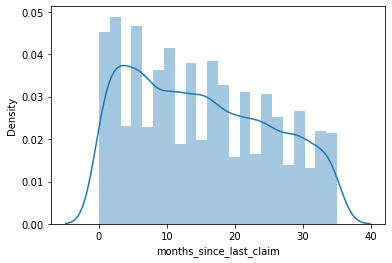

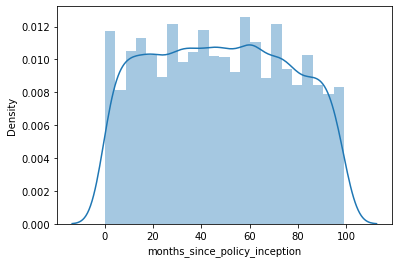

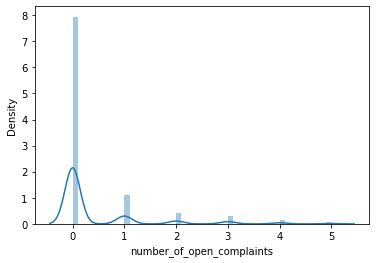

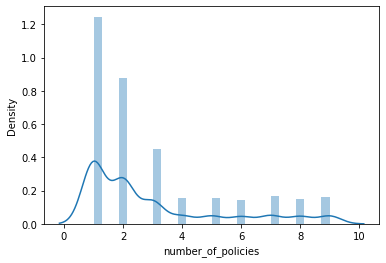

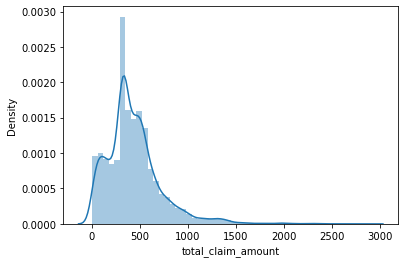

In [22]:
for val in X_num.columns:
    sns.distplot(X_num[val])
    plt.show()

In [23]:
data.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [24]:
iqr = np.percentile(X_num['customer_lifetime_value'],75) - np.percentile(data['customer_lifetime_value'],25)
upper_limit = np.percentile(data['customer_lifetime_value'],75) + 3*iqr
lower_limit = np.percentile(data['customer_lifetime_value'],25) - 3*iqr
print(iqr,upper_limit,lower_limit)

4967.915247000001 23865.91278225 -10909.493946750003


In [98]:
testdata = X_num.copy()
#testdata = testdata[(testdata['customer_lifetime_value']>lower_limit) & (testdata['customer_lifetime_value']<upper_limit)]

In [93]:
X_num.shape

(9134, 8)

In [94]:
testdata.shape

(9134, 8)

In [76]:
def log_transfom_clean_(x):
    if x == 0:
        return x
    else:
        return np.log(x) # We are returning NaNs so that we can replace them with means later   

In [77]:
from scipy import stats

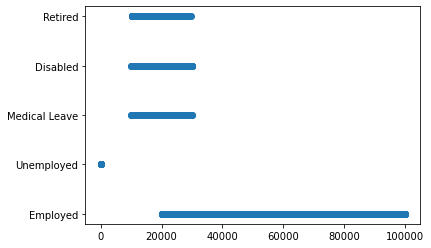

In [99]:
# replacing zero income which equals unemployment with at least the minimum amount of income of other low income 
# employment statusses, since it will be take into account in cat_values
plt.scatter(x=testdata['income'], y=X_cat['employmentstatus'])
plt.show()
df_temp = X_num.copy()
df_temp[df_temp['income']==0] = 10000
testdata['income'] = df_temp['income']

In [146]:
#print(X_num.shape)
#print(testdata.shape)

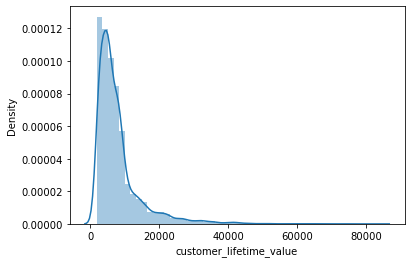

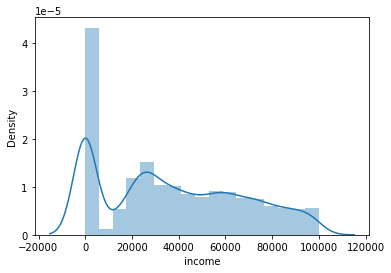

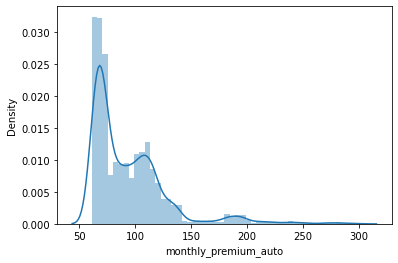

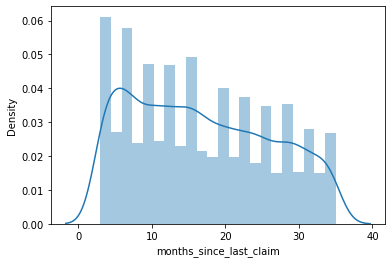

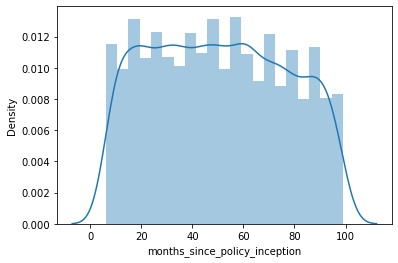

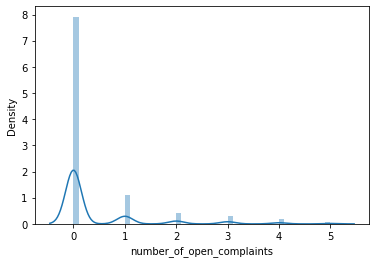

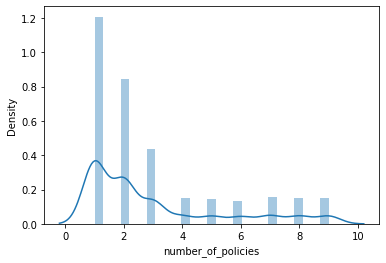

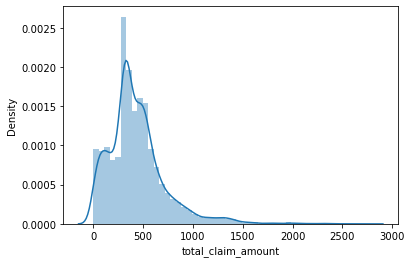

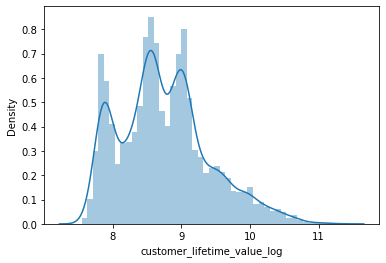

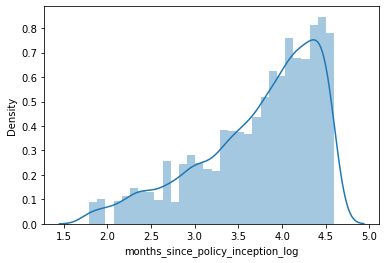

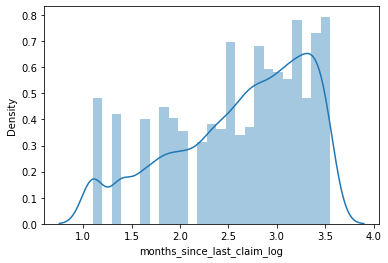

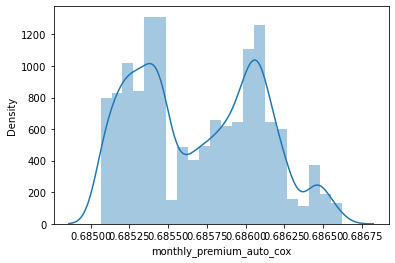

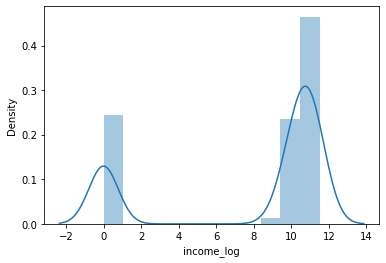

In [134]:
for val in testdata.columns:
    sns.distplot(testdata[val])
    plt.show()

In [135]:
X_num['customer_lifetime_value_log'] = list(map(log_transfom_clean_,X_num['customer_lifetime_value']))
X_num['months_since_policy_inception_log']=list(map(log_transfom_clean_,X_num['months_since_policy_inception']))
X_num['months_since_last_claim_log']=list(map(log_transfom_clean_,X_num['months_since_last_claim']))
xt, lmbda = stats.boxcox(X_num['monthly_premium_auto'])
X_num['monthly_premium_auto_cox']=xt
X_num['income_log']=list(map(log_transfom_clean_,X_num['income']))


In [137]:
X_num.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,customer_lifetime_value_log,months_since_policy_inception_log,months_since_last_claim_log,monthly_premium_auto_cox,income_log
0,2763.519279,56274,69,32,5,0,1,384.811147,7.924260,1.609438,3.465736,0.685347,10.937988
1,6979.535903,0,94,13,42,0,8,1131.464935,8.850738,3.737670,2.564949,0.685871,0.000000
2,12887.431650,48767,108,18,38,0,2,566.472247,9.464008,3.637586,2.890372,0.686039,10.794809
3,7645.861827,0,106,18,65,0,7,529.881344,8.941920,4.174387,2.890372,0.686018,0.000000
4,2813.692575,43836,73,12,44,0,1,138.130879,7.942253,3.784190,2.484907,0.685461,10.688211


In [143]:
X_num = X_num.drop(['customer_lifetime_value','months_since_policy_inception','months_since_last_claim','monthly_premium_auto','income'],axis=1)

In [144]:
X_num.head()

,number_of_open_complaints,number_of_policies,total_claim_amount,customer_lifetime_value_log,months_since_policy_inception_log,months_since_last_claim_log,monthly_premium_auto_cox,income_log
0,0,1,384.811147,7.924260,1.609438,3.465736,0.685347,10.937988
1,0,8,1131.464935,8.850738,3.737670,2.564949,0.685871,0.000000
2,0,2,566.472247,9.464008,3.637586,2.890372,0.686039,10.794809
3,0,7,529.881344,8.941920,4.174387,2.890372,0.686018,0.000000
4,0,1,138.130879,7.942253,3.784190,2.484907,0.685461,10.688211


## 04 - Processing Data ##

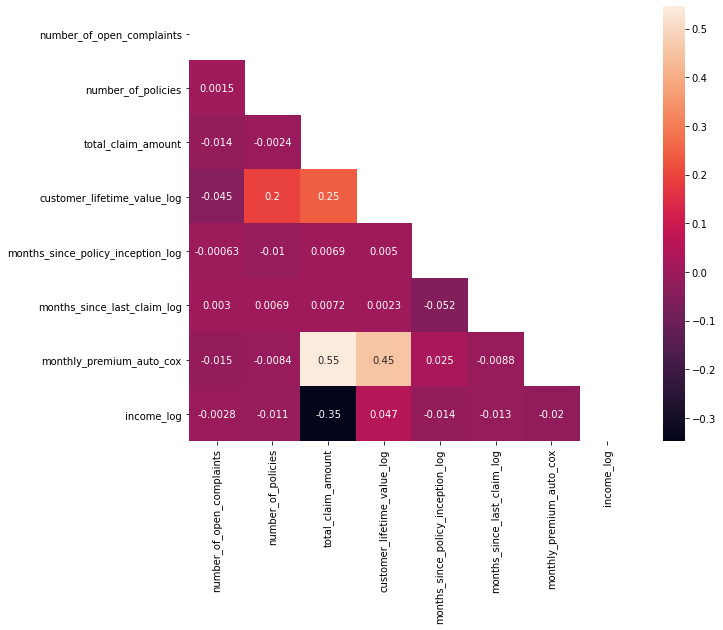

In [145]:
correlations_matrix = X_num.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

### Dealing with outliers #

In [ ]:
#testdata = X_num.copy()
#testdata['customer_lifetime_value_log'] = list(map(log_transfom_clean_,testdata['customer_lifetime_value']))
#testdata['months_since_policy_inception_log']=list(map(log_transfom_clean_,testdata['months_since_policy_inception']))
#testdata['months_since_last_claim_log']=list(map(log_transfom_clean_,testdata['months_since_last_claim']))
#xt, lmbda = stats.boxcox(testdata['monthly_premium_auto'])
#testdata['monthly_premium_auto_cox']=xt
#testdata['income_log']=list(map(log_transfom_clean_,testdata['income']))

In [ ]:
#iqr = np.percentile(testdata['months_since_policy_inception'],75) - np.percentile(testdata['months_since_policy_inception'],25)
#upper_limit = np.percentile(testdata['months_since_policy_inception'],75) + 1.5*iqr
#lower_limit = np.percentile(testdata['months_since_policy_inception'],25) - 0.4*iqr
#testdata = testdata[(testdata['months_since_policy_inception']>lower_limit) & (testdata['months_since_policy_inception']<upper_limit)]

In [ ]:
#print(X_num.shape)
#print(testdata.shape)

In [ ]:
#iqr = np.percentile(testdata['months_since_last_claim'],75) - np.percentile(testdata['months_since_last_claim'],25)
#upper_limit = np.percentile(testdata['months_since_last_claim'],75) + 1.5*iqr
#lower_limit = np.percentile(testdata['months_since_last_claim'],25) - 0.2*iqr
#testdata = testdata[(testdata['months_since_last_claim']>lower_limit) & (testdata['months_since_last_claim']<upper_limit)]

In [ ]:
#print(X_num.shape)
#print(testdata.shape)

In [ ]:
# First will go with all points for "months since..."

### Normalization # 

In [152]:
Y = X_num['total_claim_amount']
X_num = X_num.drop('total_claim_amount', axis=1)
transformer = StandardScaler().fit(X_num)
x_standardized = transformer.transform(X_num)
print(x_standardized.shape)


(9134, 7)


### Encoding Categorical Data #

In [153]:
encoded = pd.get_dummies(X_cat, drop_first=True)
encoded.head()

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,education_Master,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,employmentstatus_Unemployed,gender_M,location_code_Suburban,location_code_Urban,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [154]:
X = np.concatenate((x_standardized, encoded), axis=1)

### Splitting into train set and test set #

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=100)

# 05 - Modeling ##

### Apply model #

In [156]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)


# 06 - Model Validation ##

### R2 #

In [157]:
r2_score(y_test, predictions)

0.7597898997775933

### MSE #

In [159]:
mse = mean_squared_error(y_test, predictions)
print(mse)

19085.390473214116


### RMSE #

In [160]:
rmse = math.sqrt(mse)
print(rmse)

138.14988408686457


### MAE #

In [166]:
mae = mean_absolute_error(y_test,predictions)
print(mae)

97.38469215007898


In [170]:
predictions.shape

(3654,)

# 07 - Reporting: Present results  ##

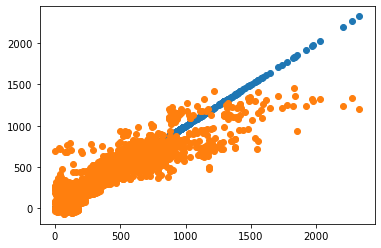

In [173]:
#predictions_full = np.concatenate((predictions,lm.predict(X_train)),axis=0)
plt.scatter(x=y_test, y=y_test)
plt.scatter(x=y_test,y=predictions)
plt.show()

In [ ]:
# Still some improvements needed...